In [41]:
# !curl -o lenna.png https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
# !curl -o baboon.png https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
# !curl -o goldhill.bmp https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp
# !curl -o cameraman.jpeg https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
# !curl -o zelda.png https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png
# !curl -o mammogram.png https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png


In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from PIL import Image


In [43]:
def Noising_image(image, prob):
    """
    Thêm nhiễu Salt & Pepper vào ảnh.

    Args:
        image: Ảnh input (numpy array).
        prob: Xác suất thêm nhiễu (nằm trong khoảng từ 0 đến 1).
    
    Returns:
        Ảnh đã được thêm nhiễu.
    """
    output = np.copy(image)
    # Xác suất để một pixel bị đổi thành muối hoặc tiêu
    salt_prob = prob / 2
    pepper_prob = prob / 2
    
    # Thêm muối (trắng)
    num_salt = np.ceil(salt_prob * image.size).astype(int)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    output[salt_coords[0], salt_coords[1]] = 255

    # Thêm tiêu (đen)
    num_pepper = np.ceil(pepper_prob * image.size).astype(int)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    output[pepper_coords[0], pepper_coords[1]] = 0

    return output


In [52]:
def Denoising_Smoothing_image(image, filter_type):
    if filter_type == 'Gaussian':
        filtered = cv2.GaussianBlur(image, (5, 5), 0)  # Smoothing
    elif filter_type == 'Median':
        filtered = cv2.medianBlur(image, 5)  # Smoothing, can reduce noise
    elif filter_type == 'Mean':
        filtered = cv2.blur(image, (5, 5))  # Smoothing
    elif filter_type == 'Bilateral':
        filtered = cv2.bilateralFilter(image, 9, 75, 75)  # Denoising while keeping edges
    return filtered


In [46]:
def Sharpening_image (image, filter):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened
    

In [47]:
def Sobel_filter (image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    return sobel

In [48]:
def Prewitt_filter (image):
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewittx = cv2.filter2D(image, -1, kernelx)
    prewitty = cv2.filter2D(image, -1, kernely)
    prewitt = np.sqrt(prewittx**2 + prewitty**2)
    return prewitt  

In [49]:
def Canny_Edge_filter (image):
    canny = cv2.Canny(image, 100, 200)
    return canny    

# Streamlit



In [28]:
option_mapping = {
    'Denoising / Smoothing': ['Gaussian', 'Median', 'Mean', 'Bilateral'],
    'Sharpening': ['Sharpening'],
    'Edge Detection filter': ['Sobel', 'Prewitt', 'Canny_Edge']
}

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from PIL import Image

In [1]:
def Sobel_filter (image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    return sobel

def Prewitt_filter (image):
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewittx = cv2.filter2D(image, -1, kernelx)
    prewitty = cv2.filter2D(image, -1, kernely)
    prewitt = np.sqrt(prewittx**2 + prewitty**2)
    return prewitt  

def Canny_Edge_filter (image):
    canny = cv2.Canny(image, 100, 200)
    return canny   


Text(0.5, 1.0, 'Canny Edge Filter')

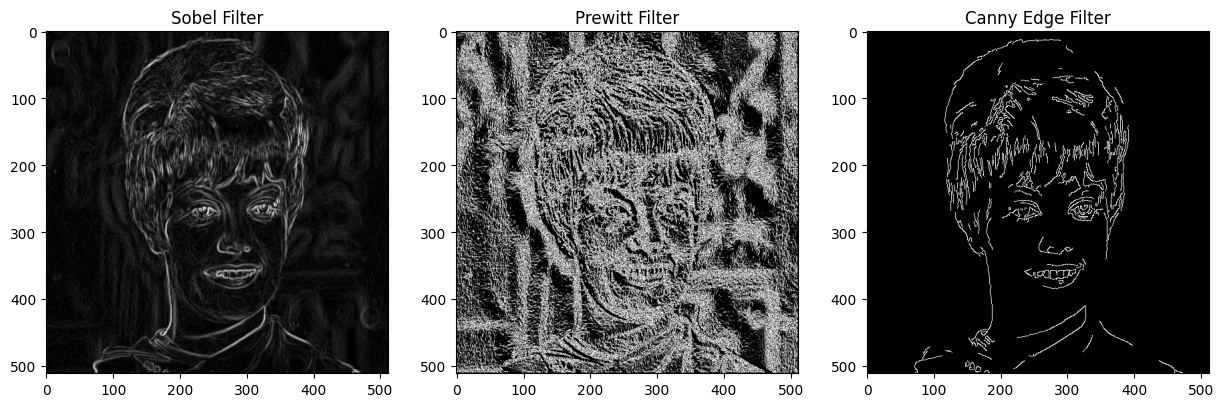

: 

In [5]:



img_color = cv2.imread('zelda.png')  # Đọc ảnh
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Chuyển sang xám

# Kiểm tra từng bộ lọc
sobel_result = Sobel_filter(img_gray)
prewitt_result = Prewitt_filter(img_gray)
canny_result = Canny_Edge_filter(img_gray)

# Hiển thị kết quả
cv2.imshow('Sobel Result', sobel_result.astype(np.uint8))
cv2.imshow('Prewitt Result', prewitt_result.astype(np.uint8))
cv2.imshow('Canny Result', canny_result)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Filter')

plt.subplot(1, 3, 2)
plt.imshow(prewitt_result, cmap='gray')
plt.title('Prewitt Filter')

plt.subplot(1, 3, 3)
plt.imshow(canny_result, cmap='gray')
plt.title('Canny Edge Filter')


In [ ]:
    st.title('Image Processing')
    image_up = st.file_uploader('Upload your image', type=['png', 'jpg', 'jpeg', 'bmp'])


    st.markdown("""
    **Note:** Lua chon yeu cau cua ban:
    - **1. Denoising / Smoothing**
    - **2. Sharpening**
    - **3. Edge Detection filter: Sobel, Prewitt, Canny Edge**
    """)

    # Chon yeu cau theo markdown
    option = st.selectbox('Choose your option', ('Denoising / Smoothing', 'Sharpening', 'Edge Detection filter'))
    option_mapping = {
        'Denoising / Smoothing': ['Gaussian', 'Median', 'Mean', 'Bilateral'],
        'Sharpening': ['Sharpening'],
        'Edge Detection filter': ['Sobel', 'Prewitt', 'Canny Edge']
    }
# if st.button("Plot image"):
#     img = Image.open(image_up)
#     cols_plot = st.columns(5)
#     with cols_plot[0]:  # Đặt ảnh ở đầu tiên
#         st.image(img, caption="Input Image", width=120)  # Điều chỉnh width để ảnh nhỏ hơn
#     if option == 'Denoising / Smoothing':
#         filter = st.selectbox('Choose filter', option_mapping[option])
#         if st.button("Plot image with filter {}".format(filter)):
#             img_pre = np.array(img)
#             denoised = Denoising_Smoothing_image(img_pre, filter)
#             with cols_plot[1]:
#                 st.image(denoised, caption="Denoised Image with filter ", width=120)
#     elif option == 'Sharpening':
#         filter = 'Sharpening'
#         if st.button("Plot image with filter {}".format(filter)):
#             img = np.array(img)
#             sharpened = Sharpening_image(img, filter)
#             with cols_plot[1]:
#                 st.image(sharpened, caption="Sharpened Image", width=120)
#     elif option == 'Edge Detection filter':
#         filter = st.selectbox('Choose filter', option_mapping[option])
#         if st.button("Plot image with filter {}".format(filter)):
#             img = np.array(img)
#             for i, filter in enumerate(option_mapping[option]):
#                 cols_plot[i+1].image(eval(filter + '_filter')(img), caption=filter, width=120)




In [55]:
!streamlit run lab03.ipynb

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io
